In [99]:
# basic packages
import pandas as pd
import numpy as np

# visualization
import seaborn as sb
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

# data scalers
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MinMaxScaler

# model training
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

# model evaluation
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

# classifiers
from sklearn.neighbors import KNeighborsClassifier # KNN
from sklearn.linear_model import LogisticRegression # logistic regression
from sklearn.tree import DecisionTreeClassifier # decision Tree
from sklearn.neural_network import MLPClassifier # multi layer perceptron (simple neural net)
from sklearn.ensemble import RandomForestClassifier # random forest
from sklearn.ensemble import GradientBoostingClassifier # gbm
import xgboost as xgb # xgboost

# ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [49]:
data = pd.read_csv('Final Dataset.csv')
data.head()

,Unnamed: 0,Unnamed: 0.1,Title,Technology Broad Category,Technology Mid-Type,Technology Sub-Type,Status,Rated Power (kW),Duration (hours),Latitude,...,Longitude_East,Longitude_West,Elevation,Elevation_North,Elevation_South,Elevation_East,Elevation_West,Max Temp,Min Temp,Average Temp
0,0,0,Ponale (Riva del Garda Ledro) Hydroelectric Po...,Pumped Hydro Storage,Open-loop Pumped Hydro Storage,Open-loop Pumped Hydro Storage,Operational,80000,0.0,45.888517,...,10.845,10.835,90.318260,94.701324,62.795341,74.825035,188.014160,16.9,-0.6,8.075000
1,1,1,Urdiceto Hydroelectric Power Station,Pumped Hydro Storage,Open-loop Pumped Hydro Storage,Open-loop Pumped Hydro Storage,Operational,7200,0.0,42.633421,...,0.225,0.215,1002.296509,1249.593384,1091.346802,1076.144287,1079.851440,17.7,7.6,12.233333
2,2,2,Rocky River Pumped Storage Plant,Pumped Hydro Storage,Open-loop Pumped Hydro Storage,Open-loop Pumped Hydro Storage,Operational,29000,0.0,41.582580,...,-73.425,-73.435,66.019066,68.805016,129.584091,61.000000,67.746742,20.7,-6.0,7.833333
3,3,3,Etzelwerk Pumped Hydro Storage Power Station,Pumped Hydro Storage,Open-loop Pumped Hydro Storage,Open-loop Pumped Hydro Storage,Operational,135000,0.0,47.136963,...,8.785,8.775,888.960022,888.960022,888.960022,888.960022,889.000000,16.9,-0.6,8.075000
4,4,4,Skhodnenskaya Hydro Plant,Pumped Hydro Storage,Open-loop Pumped Hydro Storage,Open-loop Pumped Hydro Storage,Operational,30000,0.0,55.850657,...,37.445,37.435,173.639954,175.949539,171.961624,174.227707,176.101135,17.0,-9.7,4.266667


In [50]:
len(data)

1693

In [51]:
# Get elevation difference
data['Elevation_North'] = abs(data['Elevation_North'] - data['Elevation'])
data['Elevation_South'] = abs(data['Elevation_South'] - data['Elevation'])
data['Elevation_East'] = abs(data['Elevation_East'] - data['Elevation'])
data['Elevation_West'] = abs(data['Elevation_West'] - data['Elevation'])
data['Elevation Difference'] = data[['Elevation_North','Elevation_South','Elevation_East','Elevation_West']].max(axis=1)

In [52]:
# Select columns to use for features X and targert Y
columns = ['Technology Broad Category','Technology Mid-Type','Technology Sub-Type','Status','Rated Power (kW)','Duration (hours)','Latitude','Longitude','Elevation','Elevation Difference','Max Temp','Min Temp','Average Temp']
data = data[columns]
data.head()

,Technology Broad Category,Technology Mid-Type,Technology Sub-Type,Status,Rated Power (kW),Duration (hours),Latitude,Longitude,Elevation,Elevation Difference,Max Temp,Min Temp,Average Temp
0,Pumped Hydro Storage,Open-loop Pumped Hydro Storage,Open-loop Pumped Hydro Storage,Operational,80000,0.0,45.888517,10.84,90.318260,97.695900,16.9,-0.6,8.075000
1,Pumped Hydro Storage,Open-loop Pumped Hydro Storage,Open-loop Pumped Hydro Storage,Operational,7200,0.0,42.633421,0.22,1002.296509,247.296875,17.7,7.6,12.233333
2,Pumped Hydro Storage,Open-loop Pumped Hydro Storage,Open-loop Pumped Hydro Storage,Operational,29000,0.0,41.582580,-73.43,66.019066,63.565025,20.7,-6.0,7.833333
3,Pumped Hydro Storage,Open-loop Pumped Hydro Storage,Open-loop Pumped Hydro Storage,Operational,135000,0.0,47.136963,8.78,888.960022,0.039978,16.9,-0.6,8.075000
4,Pumped Hydro Storage,Open-loop Pumped Hydro Storage,Open-loop Pumped Hydro Storage,Operational,30000,0.0,55.850657,37.44,173.639954,2.461182,17.0,-9.7,4.266667


In [53]:
col = np.where(pd.isnull(data))[1]
for i in range(max(col)+1):
    if (col==i).sum() > 0:
        print('number of missing values in ' + str(data.columns[i]) + ': ' + str((col==i).sum()))
print('total missing data :' + str(len(col)))
data = data.dropna()
print('number of datapoints after removing null values :' + str(len(data)))

number of missing values in Status: 1
total missing data :1
number of datapoints after removing null values :1692


In [54]:
statuses = ['Operational','Offline/Under Repair','Under Construction']
data = data.loc[data['Status'].isin(statuses)]
print('number of datapoints after removing decomissioned and not building :' + str(len(data)))

number of datapoints after removing decomissioned and not building :1381


In [55]:
# Examine Categories
data.groupby('Technology Broad Category').count()['Technology Mid-Type']

Technology Broad Category
Compressed Air Energy Storage      2
Electro-chemical                 748
Electro-mechanical                55
Hydrogen Storage                   9
Lead-Carbon                        2
Liquid Air Energy Storage          1
Lithium Ion Battery               27
Pumped Hydro Storage             328
Thermal Storage                  209
Name: Technology Mid-Type, dtype: int64

In [56]:
data.groupby('Technology Mid-Type').count()['Technology Broad Category']

Technology Mid-Type
Advanced Lead-acid Battery             1
Chilled Water Thermal Storage         25
Closed-loop Pumped Hydro Storage       3
Compressed Air Energy Storage         13
Concrete Thermal Storage               1
Electrical-mechanical                  2
Electro-chemical                      86
Electro-chemical Capacitor            26
Electrochemical                        1
Flow Battery                          63
Flywheel                              41
Heat Thermal Storage                  19
Hydrogen Storage                       9
Ice Thermal Storage                  124
Lead-Carbon                            2
Lead-acid Battery                     75
Liquid Air Energy Storage              2
Lithium Ion Titanate Battery           1
Lithium Iron Phosphate Battery         3
Lithium Polymer Battery               28
Lithium-ion Battery                  413
Molten Salt Thermal Storage           34
Nickel based Battery                   6
Open-loop Pumped Hydro Storage       

## Grouping of Categories
The category grouping shall be done according to:
- ESS with similar properties such as different types of flow battery can be combined into a single category
- Each category should have sufficient number of datapoints

Grouping
- 'Technology Broad Category' grouping for pumped hydro and Electro-mechanical is maintained
- For Electro-chemical, there are large number of datapoints, and comprises of different types of technologies, hence 'Technology Mid-Type' will be used to further breakdown into more groups.
    - Lead based batteries (75+)
    - Lithium based batteries (413+)
    - Sodium based batteries (63+)
    - Flow batteries (63)
    - Other batteries that do not fall into those categories
- For Thermal storage, there are heat thermal and cold thermal storage

In [57]:
data['Category'] = data['Technology Broad Category']

#1. Lithium Battery
data['Category'].loc[data['Technology Mid-Type'].str.contains('Lithium')] = 'Lithium Battery'
#2. Lead Battery
data['Category'].loc[data['Technology Mid-Type'].str.contains('Lead')] = 'Lead Battery'
#3. Sodium Battery
data['Category'].loc[data['Technology Mid-Type'].str.contains('Sodium')] = 'Sodium Battery'
#4. Flow Battery
data['Category'].loc[data['Technology Mid-Type'].str.contains('Flow')] = 'Flow Battery'

#5. Cold thermal storage
data['Category'].loc[data['Technology Mid-Type'].str.contains('Chilled|Ice')] = 'Cold Thermal'
#6. Hot thermal storage
data['Category'].loc[data['Technology Mid-Type'].str.contains('Heat|Concrete|Molten')] = 'Hot Thermal'


In [58]:
data.groupby('Category').count()['Status']

Category
Cold Thermal                     150
Compressed Air Energy Storage      2
Electro-chemical                 119
Electro-mechanical                55
Flow Battery                      67
Hot Thermal                       54
Hydrogen Storage                   9
Lead Battery                      80
Liquid Air Energy Storage          1
Lithium Battery                  445
Pumped Hydro Storage             328
Sodium Battery                    67
Thermal Storage                    4
Name: Status, dtype: int64

In [59]:
# Consolidation of remaining small categories into larger categories
data['Category'].loc[data['Category'] == 'Compressed Air Energy Storage'] = 'Electro-mechanical'
data['Category'].loc[data['Category'] == 'Liquid Air Energy Storage'] = 'Electro-mechanical'
# Drop remaining thermal storage - unclear if cold or hot thermal
data = data.loc[data['Category'] != 'Thermal Storage']
# Drop Hydrogen Storage - dataset too small
data = data.loc[data['Category'] != 'Hydrogen Storage']
data.groupby('Category').count()['Status']

Category
Cold Thermal            150
Electro-chemical        119
Electro-mechanical       58
Flow Battery             67
Hot Thermal              54
Lead Battery             80
Lithium Battery         445
Pumped Hydro Storage    328
Sodium Battery           67
Name: Status, dtype: int64

## Exploratory Data Analysis & Data Processing

In [60]:
data.describe()

,Rated Power (kW),Duration (hours),Latitude,Longitude,Elevation,Elevation Difference,Max Temp,Min Temp,Average Temp
count,1.368000e+03,1368.000000,1368.000000,1368.000000,1368.000000,1368.000000,1368.000000,1368.000000,1368.000000
mean,1.275541e+05,14.426835,33.918213,-5.372465,224.920938,39.032829,21.018275,3.414985,12.166265
std,3.342279e+05,388.047966,19.538581,86.645725,863.361092,61.652829,4.756232,9.514957,6.094505
min,0.000000e+00,0.000000,-77.524740,-170.279946,-5464.533203,0.000000,-8.500000,-34.200000,-24.125000
25%,6.850000e+01,0.000000,33.101203,-82.545000,26.754828,5.297775,17.700000,-0.600000,8.100000
50%,1.000000e+03,1.330000,38.000000,0.000000,161.943100,13.361488,20.700000,2.900000,12.033333
75%,3.612500e+04,4.000000,43.583110,21.452500,442.101875,41.624542,24.400000,8.800000,15.066667
max,3.003000e+06,14310.330000,67.038639,174.170000,4280.655762,478.546387,35.700000,27.100000,28.925000


array([[<AxesSubplot:title={'center':'Rated Power (kW)'}>,
        <AxesSubplot:title={'center':'Duration (hours)'}>,
        <AxesSubplot:title={'center':'Latitude'}>],
       [<AxesSubplot:title={'center':'Longitude'}>,
        <AxesSubplot:title={'center':'Elevation'}>,
        <AxesSubplot:title={'center':'Elevation Difference'}>],
       [<AxesSubplot:title={'center':'Max Temp'}>,
        <AxesSubplot:title={'center':'Min Temp'}>,
        <AxesSubplot:title={'center':'Average Temp'}>]], dtype=object)

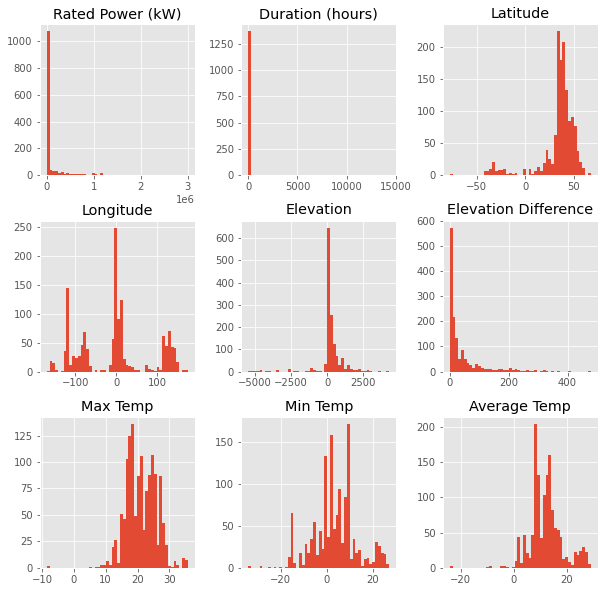

In [61]:
matplotlib.style.use('ggplot')
data.hist(bins=50, figsize=(10,10))

array([[<AxesSubplot:title={'center':'Log Scaler'}>,
        <AxesSubplot:title={'center':'Normalizer'}>],
       [<AxesSubplot:title={'center':'MinMaxScaler'}>,
        <AxesSubplot:title={'center':'Robust Scaler'}>]], dtype=object)

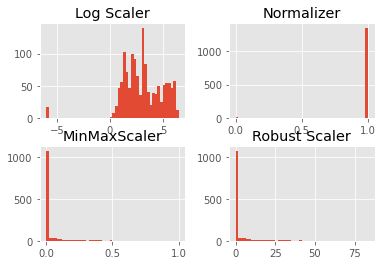

In [62]:
# Visualize for Rated Power
temp = pd.DataFrame()
temp['Log Scaler'] = np.log10(data['Rated Power (kW)']+0.000001)
temp['Normalizer'] = Normalizer().fit_transform(data['Rated Power (kW)'].values.reshape(-1,1))
temp['MinMaxScaler'] = MinMaxScaler().fit_transform(data['Rated Power (kW)'].values.reshape(-1,1))
temp['Robust Scaler'] = RobustScaler().fit_transform(data['Rated Power (kW)'].values.reshape(-1,1))
temp.hist(bins=50)

array([[<AxesSubplot:title={'center':'Log Scaler'}>,
        <AxesSubplot:title={'center':'Normalizer'}>],
       [<AxesSubplot:title={'center':'Robust Scaler'}>,
        <AxesSubplot:title={'center':'MinMaxScaler'}>]], dtype=object)

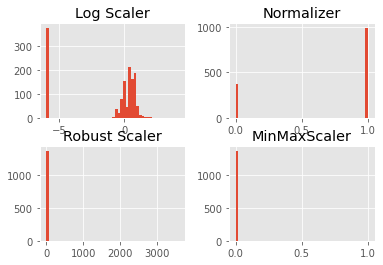

In [63]:
temp = pd.DataFrame()
temp['Log Scaler'] = np.log10(data['Duration (hours)']+0.000001)
temp['Normalizer'] = Normalizer().fit_transform(data['Duration (hours)'].values.reshape(-1,1))
temp['Robust Scaler'] = RobustScaler().fit_transform(data['Duration (hours)'].values.reshape(-1,1))
temp['MinMaxScaler'] = MinMaxScaler().fit_transform(data['Duration (hours)'].values.reshape(-1,1))
temp.hist(bins=50)

array([[<AxesSubplot:title={'center':'Log Scaler'}>,
        <AxesSubplot:title={'center':'Normalizer'}>],
       [<AxesSubplot:title={'center':'Robust Scaler'}>,
        <AxesSubplot:title={'center':'MinMaxScaler'}>]], dtype=object)

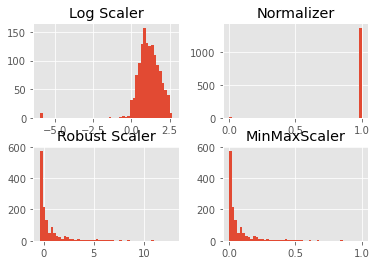

In [64]:
temp = pd.DataFrame()
temp['Log Scaler'] = np.log10(data['Elevation Difference']+0.000001)
temp['Normalizer'] = Normalizer().fit_transform(data['Elevation Difference'].values.reshape(-1,1))
temp['Robust Scaler'] = RobustScaler().fit_transform(data['Elevation Difference'].values.reshape(-1,1))
temp['MinMaxScaler'] = MinMaxScaler().fit_transform(data['Elevation Difference'].values.reshape(-1,1))
temp.hist(bins=50)

In [65]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
tech_cat = data['Category']
tech_cat_encoded = encoder.fit_transform(tech_cat)
print(encoder.classes_)
data['Category Encoded'] = tech_cat_encoded

['Cold Thermal' 'Electro-chemical' 'Electro-mechanical' 'Flow Battery'
 'Hot Thermal' 'Lead Battery' 'Lithium Battery' 'Pumped Hydro Storage'
 'Sodium Battery']


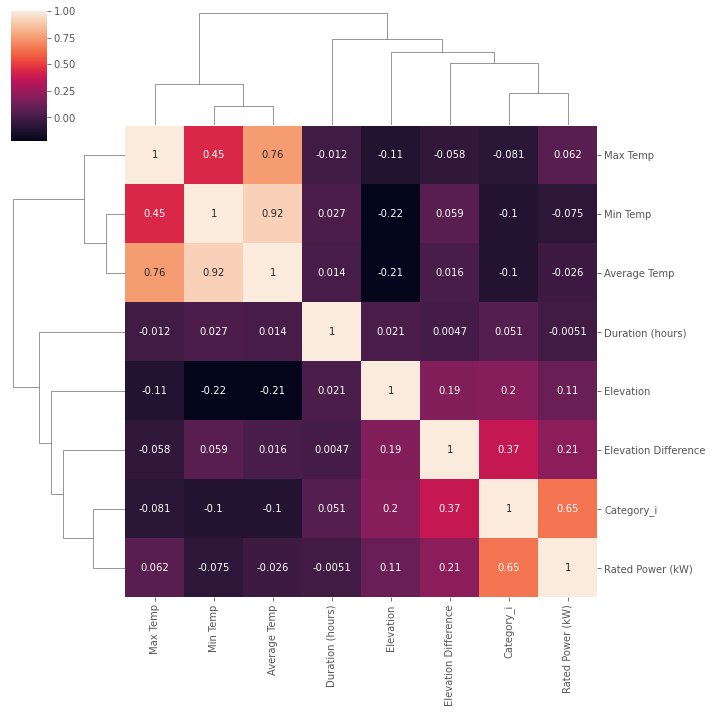

In [66]:
# Change i below to one of the Categories:
# ['Cold Thermal' 'Electro-chemical' 'Electro-mechanical' 'Flow Battery'
#  'Hot Thermal' 'Lead Battery' 'Lithium Battery' 'Pumped Hydro Storage'
#  'Sodium Battery']
i = 7
data['Category_i'] = (data['Category'] == encoder.classes_[i])

features = ['Category_i','Elevation','Elevation Difference', 'Rated Power (kW)', 'Duration (hours)','Min Temp','Max Temp','Average Temp'] 
sb.clustermap(data[features].corr(), annot=True)

In [67]:
data2 = data.copy()

In [68]:
# Applying log scaler
data2['Rated Power (kW)'] = np.log10(data2['Rated Power (kW)']+0.000001)
data2['Duration (hours)'] = np.log10(data2['Duration (hours)']+0.000001)
data2['Elevation Difference'] = np.log10(data2['Elevation Difference']+0.000001)

In [69]:
data2.columns

Index(['Technology Broad Category', 'Technology Mid-Type',
       'Technology Sub-Type', 'Status', 'Rated Power (kW)', 'Duration (hours)',
       'Latitude', 'Longitude', 'Elevation', 'Elevation Difference',
       'Max Temp', 'Min Temp', 'Average Temp', 'Category', 'Category Encoded',
       'Category_i'],
      dtype='object')

In [70]:
# remove the following columns
to_drop = ['Technology Broad Category','Technology Mid-Type','Technology Sub-Type','Status','Latitude','Latitude','Category','Category_i']
data2 = data2.drop(to_drop, axis=1)
data2.head()

,Rated Power (kW),Duration (hours),Longitude,Elevation,Elevation Difference,Max Temp,Min Temp,Average Temp,Category Encoded
0,4.903090,-6.0,10.84,90.318260,1.989876,16.9,-0.6,8.075000,7
1,3.857332,-6.0,0.22,1002.296509,2.393219,17.7,7.6,12.233333,7
2,4.462398,-6.0,-73.43,66.019066,1.803218,20.7,-6.0,7.833333,7
3,5.130334,-6.0,8.78,888.960022,-1.398168,16.9,-0.6,8.075000,7
4,4.477121,-6.0,37.44,173.639954,0.391144,17.0,-9.7,4.266667,7


## Model Training

In [71]:
# data split
x = data2.drop('Category Encoded', axis=1)
y = data2['Category Encoded']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state=0)

In [80]:
# K-nearest neighbors, Logistic regression, Decision trees, Random forest, Gradient boosting machine
model_names = ['KNN', 'LR', 'DT', 'MLP', 'RF', 'GBM']
data_acc = []
data_f1 = []

# KNN
KNN = KNeighborsClassifier()
KNN.fit(x_train, y_train)
y_pred = KNN.predict(x_test)
print('K-Nearest Neighbors')
print(classification_report(y_test, y_pred))
print('accuracy: ', accuracy_score(y_test, y_pred))
print('\n')

LR = LogisticRegression()
LR.fit(x_train, y_train)
y_pred = LR.predict(x_test)
print('LogisticRegression')
print(classification_report(y_test, y_pred))
print('accuracy: ', accuracy_score(y_test, y_pred))
print('\n')

DT = DecisionTreeClassifier()
DT.fit(x_train, y_train)
y_pred = DT.predict(x_test)
print('Decision Tree')
print(classification_report(y_test, y_pred))
print('accuracy: ', accuracy_score(y_test, y_pred))
print('\n')

MLP = MLPClassifier()
MLP.fit(x_train, y_train)
y_pred = MLP.predict(x_test)
print('Neural Net')
print(classification_report(y_test, y_pred))
print('accuracy: ', accuracy_score(y_test, y_pred))
print('\n')

RF = RandomForestClassifier()
RF.fit(x_train, y_train)
y_pred = RF.predict(x_test)
print('Random Forest')
print(classification_report(y_test, y_pred))
print('accuracy: ', accuracy_score(y_test, y_pred))
print('\n')

GBM = GradientBoostingClassifier()
GBM.fit(x_train, y_train)
y_pred = GBM.predict(x_test)
print('Gradient Boost')
print(classification_report(y_test, y_pred))
print('accuracy: ', accuracy_score(y_test, y_pred))
print('\n')

XGB = xgb.XGBClassifier()
XGB.fit(x_train,y_train)
y_pred = XGB.predict(x_test)
print('XG-Boost')
print(classification_report(y_test, y_pred))
print('accuracy: ', accuracy_score(y_test, y_pred))
print('\n')

K-Nearest Neighbors
              precision    recall  f1-score   support

           0       0.55      0.71      0.62        41
           1       0.35      0.37      0.36        30
           2       0.00      0.00      0.00         7
           3       0.25      0.05      0.08        20
           4       0.14      0.06      0.08        17
           5       0.29      0.10      0.15        20
           6       0.42      0.60      0.49       110
           7       0.61      0.56      0.58        82
           8       0.00      0.00      0.00        15

    accuracy                           0.46       342
   macro avg       0.29      0.27      0.26       342
weighted avg       0.42      0.46      0.42       342

accuracy:  0.45614035087719296


LogisticRegression
              precision    recall  f1-score   support

           0       0.38      0.37      0.37        41
           1       0.71      0.17      0.27        30
           2       0.00      0.00      0.00         7
      

### Model Tuning
- The 3 tree based ensemble models perform similarly
- Hyperparameter tuning is applied to random forest classifier with 5 fold cross validation
    - Random grid search with larger range of hyperparameter values to narrow down range 
    - Exhaustive grid search with smaller range of hyperparamter values to identify best model

In [98]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 500, num = 50)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(start = 10, stop = 100, num = 10)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

{'n_estimators': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160, 170, 180, 190, 200, 210, 220, 230, 240, 250, 260, 270, 280, 290, 300, 310, 320, 330, 340, 350, 360, 370, 380, 390, 400, 410, 420, 430, 440, 450, 460, 470, 480, 490, 500], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [102]:
RF = RandomForestClassifier()
RF_grid = RandomizedSearchCV(estimator = RF, param_distributions = random_grid, n_iter = 50, cv = 5, verbose=2, random_state=42, n_jobs = -1)

RF_grid.fit(x_train, y_train)
best_params = RF_grid.best_params_
RF = RandomForestClassifier(n_estimators = best_params["n_estimators"], 
                            max_features = best_params["max_features"],
                            max_depth = best_params["max_depth"],
                            min_samples_split = best_params["min_samples_split"],
                            min_samples_leaf = best_params["min_samples_leaf"],
                            bootstrap = best_params["bootstrap"],)
RF.fit(x_train, y_train)
y_pred = RF.predict(x_test)

print(classification_report(y_test, y_pred))
print('accuracy: ', accuracy_score(y_test, y_pred))
print('\n')

Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   11.5s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   42.4s
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:  1.2min finished


              precision    recall  f1-score   support

           0       0.71      0.85      0.78        41
           1       0.47      0.23      0.31        30
           2       0.14      0.14      0.14         7
           3       1.00      0.15      0.26        20
           4       0.92      0.65      0.76        17
           5       0.67      0.20      0.31        20
           6       0.64      0.94      0.76       110
           7       0.95      0.99      0.97        82
           8       0.67      0.13      0.22        15

    accuracy                           0.72       342
   macro avg       0.68      0.48      0.50       342
weighted avg       0.73      0.72      0.68       342

accuracy:  0.7222222222222222




In [103]:
print(best_params)

{'n_estimators': 320, 'min_samples_split': 10, 'min_samples_leaf': 4, 'max_features': 'auto', 'max_depth': 100, 'bootstrap': False}


In [121]:
# Number of trees in random forest
n_estimators = [310, 320, 330, 340]
# Maximum number of levels in tree
max_depth = [100, 110, 120]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [8, 10, 12]
# Minimum number of samples required at each leaf node
min_samples_leaf = [3, 4, 5]

params = {'n_estimators': n_estimators,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}
print(RF_grid)

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [3, 5, 7, 9, 11],
                         'n_estimators': [50, 100, 150, 200, 250]},
             scoring='accuracy', verbose=2)


In [122]:
# perform exhaustive grid search
RF = RandomForestClassifier()

RF_grid = GridSearchCV(estimator = RF, param_grid = params, scoring = 'accuracy', cv = 5, verbose=2, n_jobs = -1)

RF_grid.fit(x_train, y_train)
best_params = RF_grid.best_params_
RF = RandomForestClassifier(n_estimators = best_params["n_estimators"],
                            max_depth = best_params["max_depth"],
                            min_samples_split = best_params["min_samples_split"],
                            min_samples_leaf = best_params["min_samples_leaf"],
                            bootstrap = False,)
RF.fit(x_train, y_train)
y_pred = RF.predict(x_test)

print(classification_report(y_test, y_pred))
print('accuracy: ', accuracy_score(y_test, y_pred))
print('\n')

Fitting 5 folds for each of 144 candidates, totalling 720 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   10.7s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   49.1s
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed:  3.7min
[Parallel(n_jobs=-1)]: Done 720 out of 720 | elapsed:  4.2min finished


              precision    recall  f1-score   support

           0       0.74      0.85      0.80        41
           1       0.50      0.23      0.32        30
           2       0.14      0.14      0.14         7
           3       0.75      0.15      0.25        20
           4       0.92      0.71      0.80        17
           5       0.50      0.20      0.29        20
           6       0.64      0.93      0.76       110
           7       0.95      0.99      0.97        82
           8       0.50      0.13      0.21        15

    accuracy                           0.72       342
   macro avg       0.63      0.48      0.50       342
weighted avg       0.71      0.72      0.68       342

accuracy:  0.7222222222222222




In [123]:
best_params

{'max_depth': None,
 'min_samples_leaf': 3,
 'min_samples_split': 8,
 'n_estimators': 320}